<a href="https://colab.research.google.com/github/ruanjsb/estatistica/blob/master/Estatistica_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nivelamento em Estatística ###
#### Curso de Especialização em Ciência de Dados ####
Aluno: Ruan Josemberg Silva Belém

### Introdução ###

Neste trabalho serão apresentados alguns dados estatísticos sobre os retornos diários de alguns ativos financeiros negociados na bolsa de valores brasileira $[B]^3$ (Brasil Bolsa Balcão).
Foram selecionadas quatro das ações mais negociadas em bolsa segundo o site especializado [Tradingview](https://br.tradingview.com/markets/stocks-brazilia/market-movers-active/): Itaú Unibanco (ITUB4), Petrobras (PETR4), Vale (VALE3) e Bradesco (BBDC4). Além das ações, foram incluídos também o Índice Bovespa (BOVA11) e a cotação do Dólar Americano em Reais.

Os dados com os valores de fechamento diário das ações e do índice foram obtidos a partir do serviço [Yahoo Finanças](https://br.financas.yahoo.com/) e os dados de cotação do dólar a partir do serviço [FRED Economic Data](https://fred.stlouisfed.org/series/DEXBZUS).

Para esta avaliação, foram utilizados os dados no período de 01/01/2019 até 31/10/2019, que após a remoção de dados inválidos, resultou em um total de 200 preços de fechamento diário, convertidos em 199 amostras de retorno logarítmico seguindo a equação abaixo para intervalo de um dia:
\begin{align} Log Retorno = Ln(\frac{Preço_{tempofinal}}{Preço_{tempoinicial}})\end{align}

O objetivo da análise é comparar os ativos em relação à volatilidade e retorno no período.

### Metodologia ###

Uma forma de medir a volatilidade de um ativo é calcular o desvio-padrão histórico dos retornos logarítmicos. Sendo assim, nos passos a seguir, os dados dos preços de fechamento diário dos ativos serão adquiridos e transformados, para que a análise estatística seja feita com os dados históricos de retornos logarítmicos.

#### Aquisição dos Dados ####

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
np.warnings.filterwarnings('ignore')



In [0]:
colors = ['tab:orange', 'tab:green', 'tab:cyan', 'tab:red', 'xkcd:navy blue', 'tab:blue']


In [0]:
''' A linha abaixo carrega dados salvos em arquivo com retornos desde Janeiro de 2019. Para usar os dados mais atuais no intervalo, 
comente as duas linhas abaixo e descomente o próximo bloco.'''
prices = pd.read_pickle("precos_ativos_jan")
prices = prices.dropna()

In [0]:
#data_inicial = '2019-01-01'
#data_final = '2019-10-31'
#prices=pd.DataFrame()
#tickers = ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA','BBDC4.SA', 'BOVA11.SA']
#for t in tickers:
#    prices[t]=wb.DataReader(t, data_source='yahoo', start=data_inicial, end=data_final)['Adj Close']
#prices['DOLAR'] = wb.get_data_fred('DEXBZUS', start=data_inicial, end=data_final)
#prices = prices.dropna()
#prices.to_pickle("precos_ativos")

Amostra dos dados coletados:

In [0]:
prices

,ITUB4.SA,PETR4.SA,VALE3.SA,BBDC4.SA,BOVA11.SA,DOLAR
Date,,,,,,
2019-01-02,35.868626,23.609507,51.090000,33.290855,87.900002,3.8123
2019-01-03,36.459988,24.188459,49.000000,33.631268,88.000000,3.7429
2019-01-04,35.849239,24.257149,52.189999,33.367432,88.500000,3.7149
2019-01-07,35.917107,24.639847,51.910000,33.763283,88.480003,3.7100
2019-01-08,36.372730,24.492655,52.410000,33.969421,88.830002,3.7204
...,...,...,...,...,...,...
2019-10-25,36.784763,29.057882,48.560001,35.700565,103.419998,4.0018
2019-10-28,37.284557,29.405584,48.700001,36.989861,104.070000,3.9769
2019-10-29,36.624828,29.624138,48.650002,36.480141,103.489998,3.9923


#### Comportamento dos Preços dos Ativos ####
Para facilitar a comparação, no gráfico abaixo os preços dos ativos foram normalizados de forma que todos iniciem do valor 100.

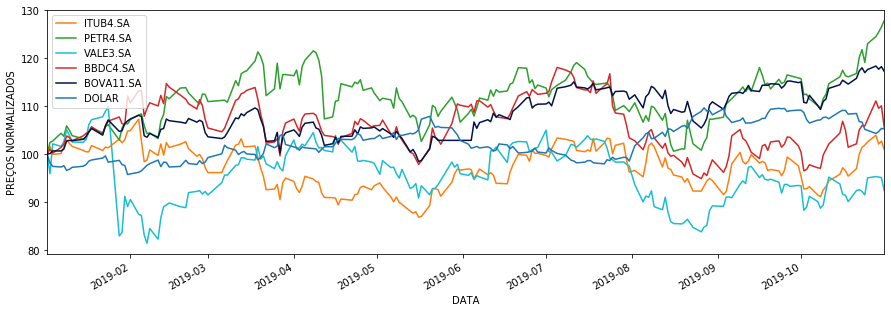

In [0]:
(prices/prices.iloc[0]*100).plot(figsize=(15,5), color = colors)
plt.ylabel('PREÇOS NORMALIZADOS')
plt.xlabel('DATA')
plt.show()

Olhando apenas para a variação do preço de fechamento, é possível verificar quais ativos tiveram maior ou menor valorização no período, mas para avaliar e comparar a volatilidade é mais fácil olhar para a variação no retorno diário. 

#### Cálculo dos Retornos Logarítmicos Diários ####
A partir dos preços de fechamento é possível calcular o retorno logarítmico diário, que nos dará o percentual de retorno positivo ou negativo de cada dia em relação ao dia anterior.

In [0]:
# retornos logarítmicos diários
log_returns=np.log(prices/prices.shift(1))
log_returns = log_returns.dropna()
log_returns

,ITUB4.SA,PETR4.SA,VALE3.SA,BBDC4.SA,BOVA11.SA,DOLAR
Date,,,,,,
2019-01-03,0.016352,0.024226,-0.041768,0.010173,0.001137,-0.018372
2019-01-04,-0.016893,0.002836,0.063071,-0.007876,0.005666,-0.007509
2019-01-07,0.001891,0.015654,-0.005379,0.011794,-0.000226,-0.001320
2019-01-08,0.012606,-0.005992,0.009586,0.006087,0.003948,0.002799
2019-01-09,0.015077,0.020619,0.024129,0.017091,0.016634,-0.010049
...,...,...,...,...,...,...
2019-10-25,0.006543,0.032311,0.037986,0.012962,0.005430,-0.002047
2019-10-28,0.013496,0.011895,0.002879,0.035477,0.006265,-0.006242
2019-10-29,-0.017853,0.007405,-0.001027,-0.013876,-0.005589,0.003865


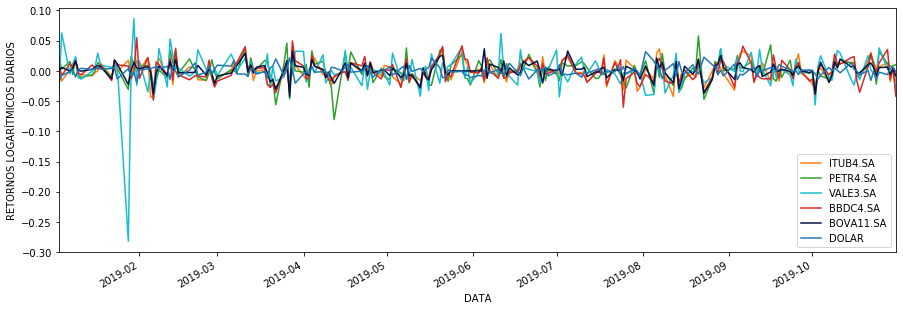

In [0]:
log_returns.plot(figsize=(15,5), color = colors)
plt.ylabel('RETORNOS LOGARÍTMICOS DIÁRIOS')
plt.xlabel('DATA')
plt.show()

O gráfico mostra que a volatilidade dos ativos está quase totalmente contida no intervalo entre -5% e +5%. Entretanto, chama a atenção um comportamento atípico no retorno da VALE no final do mês de Janeiro de 2019, com um retorno negativo próximo à 30%.
Este retorno totalmente anormal foi causado pelo impacto nas ações da VALE da tragédia de rompimento da barragem em Brumadinho, Minas Gerais. 

Fazendo um filtro para valores de retorno abaixo de -0.06 para Vale, apenas uma ocorrência pode ser encontrada:

In [0]:
log_returns[log_returns['VALE3.SA'] < -0.06]

,ITUB4.SA,PETR4.SA,VALE3.SA,BBDC4.SA,BOVA11.SA,DOLAR
Date,,,,,,
2019-01-28,0.017714,-0.030613,-0.281822,0.008079,-0.022444,0.003781


Para evitar que esta ocorrência extremamente atípica deturpe a avaliação estatística dos dados, ela será substituída pela média dos retornos iniciando em Fevereiro de 2019.

In [0]:
retorno_medio_vale = log_returns['VALE3.SA']['2019-02-01':].mean()
print(retorno_medio_vale)


0.00020266067844516806


In [0]:
log_returns.loc[(log_returns['VALE3.SA'] < -0.06),'VALE3.SA']= retorno_medio_vale

Abaixo, pode ser visto novamente o gráfico de retornos logarítmicos, após o ajuste dos dados:

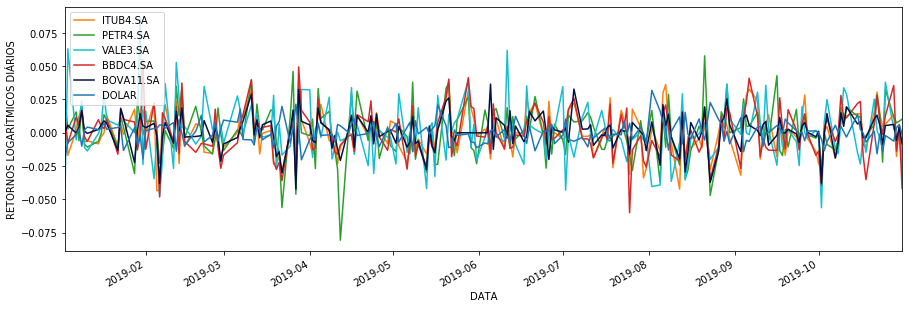

In [0]:
# retornos logarítmicos diários
log_returns.plot(figsize=(15,5), color = colors)
plt.ylabel('RETORNOS LOGARÍTMICOS DIÁRIOS')
plt.xlabel('DATA')
plt.show()

#### Medidas de tendência central ####
A seguir são apresentadas algumas medidas de tendência central para os retornos dos ativos:

In [0]:
log_returns.describe()

,ITUB4.SA,PETR4.SA,VALE3.SA,BBDC4.SA,BOVA11.SA,DOLAR
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.000048,0.001236,0.001019,0.000273,0.000802,0.000258
std,0.016223,0.018752,0.020530,0.017850,0.012534,0.007968
min,-0.043513,-0.080668,-0.056259,-0.060016,-0.042337,-0.020285
25%,-0.010636,-0.009808,-0.009736,-0.011743,-0.005618,-0.005262
50%,-0.000272,0.001593,0.000000,-0.000580,0.001187,0.000367
75%,0.011444,0.012429,0.009265,0.011753,0.007696,0.004656
max,0.038869,0.057829,0.086465,0.054952,0.036589,0.031904


Nesta tabela, os valores da linha "std", representam o desvio padrão dos retornos e, portanto, seriam a medida da volatilidade dos ativos. 

Para facilitar a avaliação da distribuição dos retornos para cada ativo, será utilizado a seguir um diagrama de caixa (*box plot*):

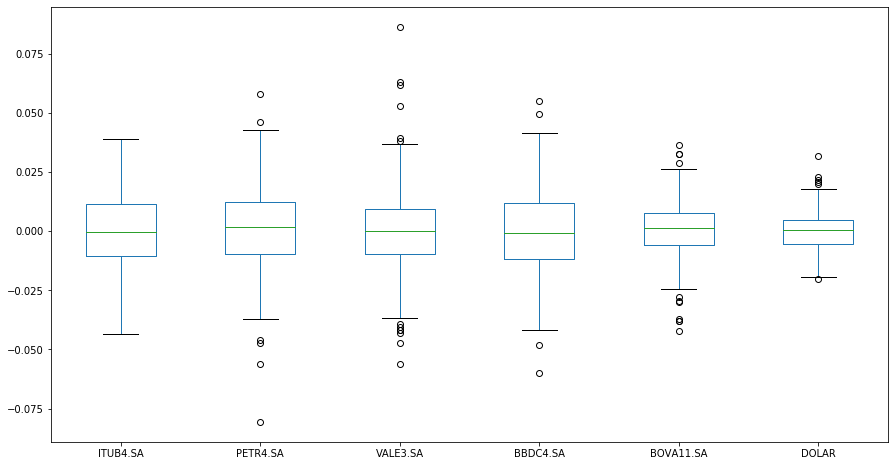

In [0]:
df = pd.DataFrame(log_returns)
ax = df.plot.box(figsize=(15,8))

Analisando o gráfico é possível perceber a diferença de amplitude das ações para o índice e o dólar, sendo que estes últimos apresentam menor amplitude, ou seja, uma menor variação.

Outro ponto que merece atenção é quantidade de *outliers* para o ativo VALE3, mostrando que, embora sua volatilidade inicialmente pareça compatível com os demais ativos, o mesmo é propenso a mudanças bruscas de preço de um dia para o outro o que pode representar grande ganhos ou grandes perdas em um curto espaço de tempo.

Em contrapartida, o ativo ITUB4 não apresenta *outliers*, o que pode ser uma característica interessante para quem procura por estabilidade.

#### Histograma e Curva Normal ####
Uma outra forma de comparar os retornos é a avaliação do histograma e da curva normal usando a média e desvio padrão de cada ativo.

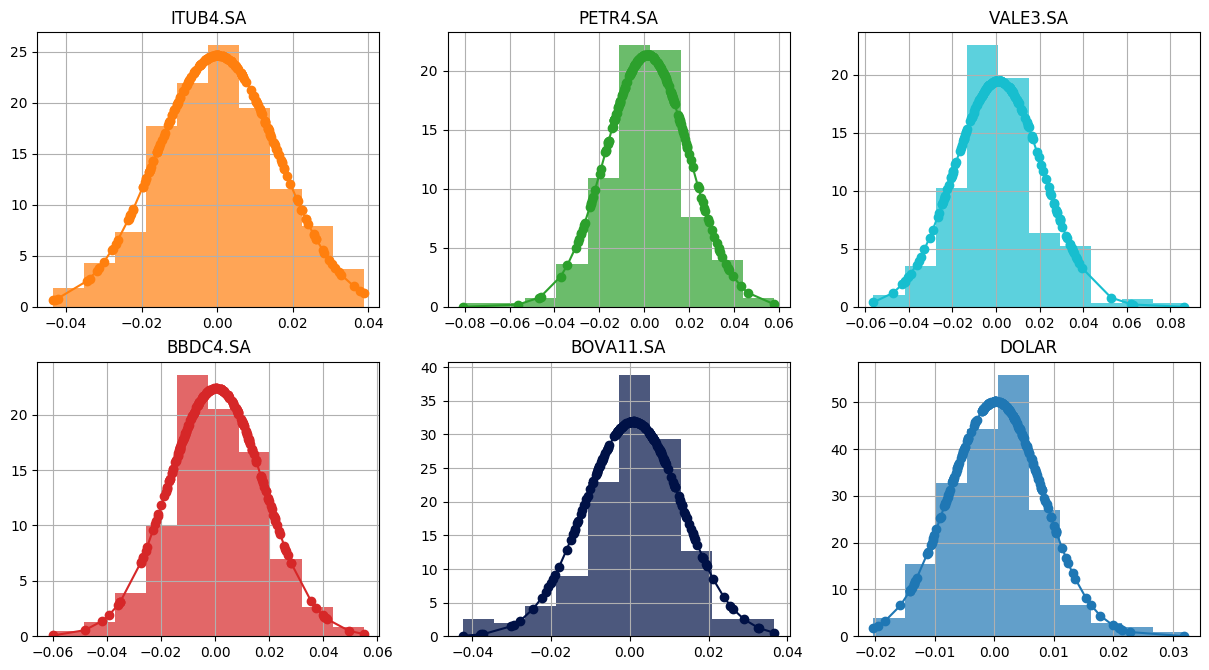

In [0]:
df = pd.DataFrame(log_returns)
fig, axes = plt.subplots(2, 3, figsize=(15,8), dpi=100, sharex=False, sharey=False)
for i, (ax, ativo) in enumerate(zip(axes.flatten(), log_returns.columns)):
    h = sorted(df[ativo].dropna())
    fit = norm.pdf(h, np.mean(h), np.std(h))
    ax.plot(h,fit,'-o', color=colors[i])
    ax.hist(h,density=True, alpha=0.7, bins=10, color=colors[i])
    ax.set_title(ativo)
    ax.grid()


O gráfico mostra que os ativos ITUB4 e PETR4 são os que apresentam melhor ajuste à distribuição normal.

#### Curva Normal Reduzida ####
Em uma estratégia de operações diárias, qual ativo teria maior probabilidade de ter um retorno (volatilidade) entre $x1=-1\%$ e $x2=3\%$?

No gráfico a seguir têm-se a curva normal reduzida, gerada pela transformação da curva de cada ativo em uma curva normal com média igual a 0 $(μ = 0)$ e desvio padrão igual a 1 $(σ = 1)$.

A área destacada no gráfico de cada ativo, representa a probabilidade de retornos dentro do intervalo definido.

In [0]:
# Intervalo entre retorno negativo e positivo
x1 = -0.01
x2 = 0.03

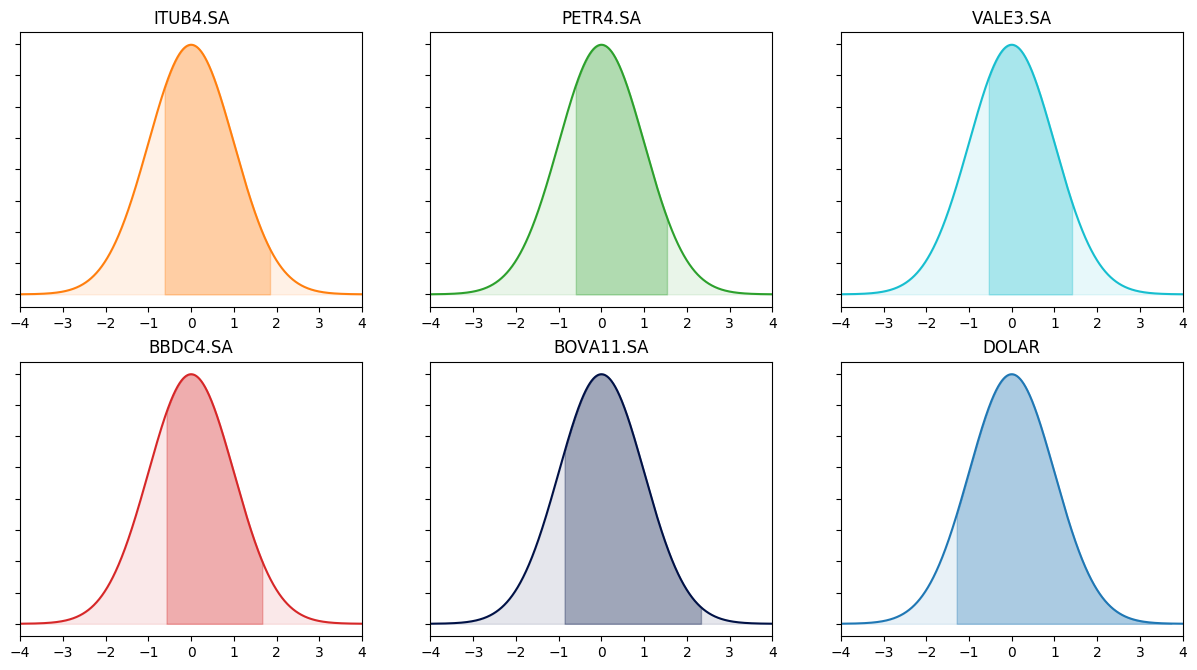

In [0]:
df = pd.DataFrame(log_returns)
fig, axes = plt.subplots(2, 3, figsize=(15,8), dpi=100, sharex=False, sharey=False)
for i, (ax, ativo) in enumerate(zip(axes.flatten(), log_returns.columns)):
    dados = df[ativo].dropna()
    mu = dados.mean()
    sigma = dados.std()
    z1 = ( x1 - mu ) / sigma
    z2 = ( x2 - mu ) / sigma
    x = np.arange(z1, z2, 0.001) 
    x_all = np.arange(-4, 4, 0.001) 
    
    y = norm.pdf(x,0,1)
    y2 = norm.pdf(x_all,0,1)
    ax.plot(x_all,y2, color=colors[i])

    ax.fill_between(x,y,0, alpha=0.3, color=colors[i])
    ax.fill_between(x_all,y2,0, alpha=0.1, color=colors[i])
    ax.set_xlim([-4,4])
    ax.set_yticklabels([])
    ax.set_title(ativo)



Como o cenário avaliado tem uma relação de $3:1$ entre o possível ganho e a possível perda. Os ativos que apresentam maior área em destaque seriam os mais indicados para testar uma estratégia com essas condições de risco e retorno.

Entre as ações, o ativo ITUB4 seria a escolha segundo este critério e entre o índice BOVA11 e o Dólar, este último seria o que apresenta maior probabilidade.

#### Correlação ####

Para entender o impacto do retorno de um ativo no outro, abaixo será apresentada a matriz de correlação entre os retornos dos ativos, sendo as variações da cor azul usadas para correlação positiva e as da cor vermelha para correlação negativa.


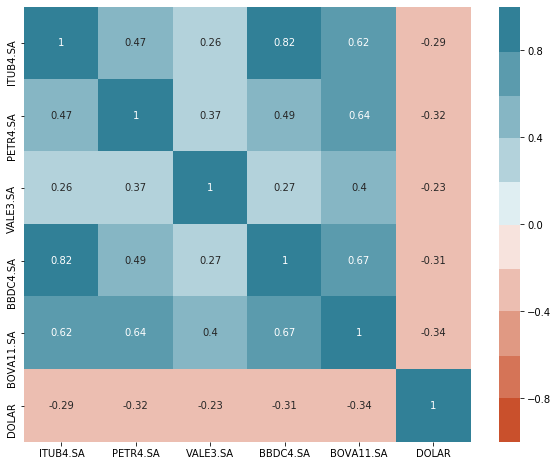

In [0]:
corrMatrix = log_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrMatrix, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns,center=0, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, s= 85, n=10), annot=True)
#sn.heatmap(corrMatrix, annot=True, cmap="Blues")
plt.show()


Como esperado, o Dólar apresenta correlação negativa com o BOVA11 e com os demais ativos.
Os ativos ITUB4 e BBDC4 apresentam alta correlação, por serem ambos do setor bancário.

### Conclusão ###
A análise estatística do retorno diário dos ativos permite uma análise inicial da volatilidade dos mesmos, mostrando características como estabilidade e probabilidade de retornos em cenários específicos.
Dentre os ativos avaliados, o ITUB4 (Banco Itaú) foi o que acumulou melhores condições de negociação, com volatilidade entre as menores e com distribuição dos retornos mais regular e próxima de uma distribuição normal.